In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
df = sns.load_dataset('tips')

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
df.groupby('sex')['total_bill'].mean()

/tmp/ipython-input-3379495421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [84]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

/tmp/ipython-input-884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [85]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

/tmp/ipython-input-1243499625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [86]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

/tmp/ipython-input-3627826641.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [87]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')

/tmp/ipython-input-2608939217.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [88]:
df.dtypes


,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [89]:
# all columns
df.pivot_table(index='sex', columns='smoker', values=['total_bill', 'tip', 'size'])


/tmp/ipython-input-525874722.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values=['total_bill', 'tip', 'size'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [90]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

/tmp/ipython-input-3218821712.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [91]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

/tmp/ipython-input-508370128.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [92]:
#margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

/tmp/ipython-input-544960437.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [93]:
# plotting graphs
df = pd.read_csv("/content/expense_data.csv")

In [94]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [95]:
df['month_by_month'] = pd.to_datetime(df['Date']).dt.month_name()

In [96]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month_by_month
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [97]:
df.pivot_table(index='month_by_month',columns='Category',values='Amount',aggfunc='sum',fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month_by_month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,5335.00,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='month_by_month'>

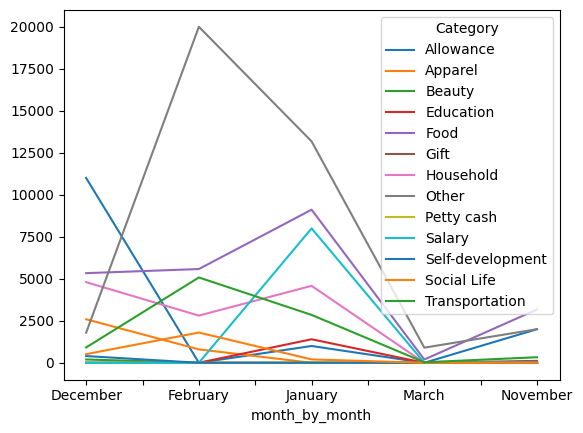

In [98]:
df.pivot_table(index='month_by_month',columns='Category',values='Amount',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month_by_month'>

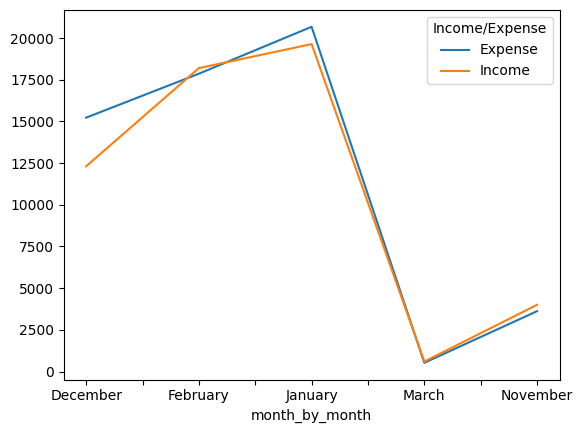

In [99]:
df.pivot_table(index='month_by_month',columns='Income/Expense',values='Amount',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month_by_month'>

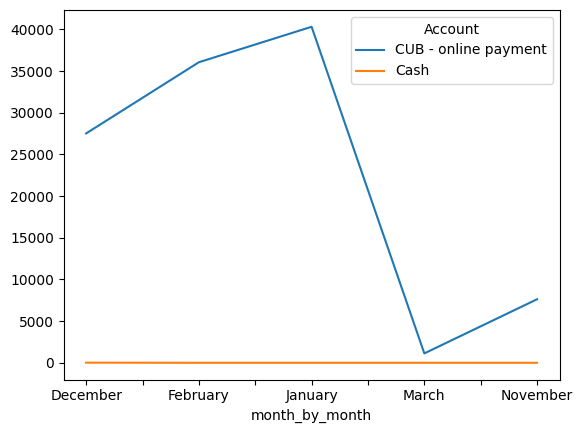

In [100]:
df.pivot_table(index='month_by_month',columns='Account',values='Amount',aggfunc='sum',fill_value=0).plot()

# Strings

In [101]:
# what are vectorized operations
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [102]:
a*4

array([ 4,  8, 12, 16])

In [103]:
s = pd.Series(['cat','mat',None,'rat'])
s.str.startswith('c')


,0
0,True
1,False
2,None
3,False


In [104]:
#import titanic
df = pd.read_csv("/content/titanic.csv")

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df['Name'].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [107]:
# COMMON STRING functions
# lower / upper / capitalize / title
df['Name'].str.lower()

,Name
0,"braund, mr. owen harris"
1,"cumings, mrs. john bradley (florence briggs th..."
2,"heikkinen, miss. laina"
3,"futrelle, mrs. jacques heath (lily may peel)"
4,"allen, mr. william henry"
...,...
886,"montvila, rev. juozas"
887,"graham, miss. margaret edith"
888,"johnston, miss. catherine helen ""carrie"""
889,"behr, mr. karl howell"


In [108]:
df['Name'].str.lower()

,Name
0,"braund, mr. owen harris"
1,"cumings, mrs. john bradley (florence briggs th..."
2,"heikkinen, miss. laina"
3,"futrelle, mrs. jacques heath (lily may peel)"
4,"allen, mr. william henry"
...,...
886,"montvila, rev. juozas"
887,"graham, miss. margaret edith"
888,"johnston, miss. catherine helen ""carrie"""
889,"behr, mr. karl howell"


In [109]:
df['Name'].str.capitalize()

,Name
0,"Braund, mr. owen harris"
1,"Cumings, mrs. john bradley (florence briggs th..."
2,"Heikkinen, miss. laina"
3,"Futrelle, mrs. jacques heath (lily may peel)"
4,"Allen, mr. william henry"
...,...
886,"Montvila, rev. juozas"
887,"Graham, miss. margaret edith"
888,"Johnston, miss. catherine helen ""carrie"""
889,"Behr, mr. karl howell"


In [110]:
df['Name'].str.title()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [111]:
# lend
df['Name'][df['Name'].str.len() == 82]

,Name
307,"Penasco y Castellana, Mrs. Victor de Satode (M..."


In [112]:
# strip
df['Name'].str.strip()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [113]:
# split
df['last_name'] = df['Name'].str.split(',').str.get(0)

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [115]:
df[['title','first_name']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [117]:
df['title'].value_counts()

,count
title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [118]:
# replace
df['title'] = df['title'].str.replace('Ms.','Miss.').replace('Mlle.','Miss.')


In [119]:
df['title'].value_counts()

,count
title,
Mr.,517
Miss.,185
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Major.,2
Col.,2
Don.,1


In [122]:
# filtereing

df[df['first_name'].str.startswith('A')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title,first_name
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss.,"Anna ""Annie"""
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Holverson,Mr.,Alexander Oskar
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss.,Amelie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Serepeca,Miss.,Augusta
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Duran y More,Miss.,Asuncion
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss.,"Adele Kiamie ""Jane"""


In [123]:
df[df['Name'].str.endswith('A')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title,first_name
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr.,Albert A
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Keane,Miss.,Nora A


In [125]:
# isdigit / isaplha
df[df['first_name'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title,first_name


In [127]:
# regex

df[df['first_name'].str.contains('John',case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title,first_name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [130]:
df[df['last_name'].str.contains('^[^aeiouAEIOUS].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Banfield,Mr.,Frederick James
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [133]:
df['Name'].str[::2]

,Name
0,"Ban,M.Oe ars"
1,Cmns r.Jh rde Foec rgsTae)
2,Hiknn is an
3,"Ftel,Ms aqe et Ll a el"
4,Aln r ila er
...,...
886,"Mnvl,Rv uzs"
887,"Gaa,Ms.Mrae dt"
888,"Jhso,Ms.CteieHln""are"
889,"Bh,M.Kr oel"


# DATE AND TIME

TIME STAMP OBJECT

CREATE TIMESTAMP OBJECT

In [135]:
# CREATE A TIMESTAMP
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [136]:
# variations
pd.Timestamp('2023-1-5')

Timestamp('2023-01-05 00:00:00')

In [140]:
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [141]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [142]:
# using text
pd.Timestamp('5th January 2023')

Timestamp('2023-01-05 00:00:00')

In [148]:
# providing time also
pd.Timestamp('5th January 2023 9:21AM')

Timestamp('2023-01-05 09:21:00')

In [149]:
# above is timestamp object of pands
# below is datetime object of python

import datetime as dt

In [150]:
dt.datetime(2023,1,5,9,21,56)

datetime.datetime(2023, 1, 5, 9, 21, 56)

In [154]:
x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))

In [155]:
x.year

2023

In [156]:
x.month

1

In [157]:
x.day

5

In [158]:
x.hour

9

In [159]:
x.minute

21

In [160]:
x.second

56

diff in timestamp and datetime

performance datetime is slow but convenient

so thr numpy added datetime64 that encodes dates as 64-bit integers


In [161]:
date = np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [162]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Date time index

In [164]:
# collection of pandas timestamp


pd.DatetimeIndex(['2023/1/4','2015/1/1'])

DatetimeIndex(['2023-01-04', '2015-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
# timestamp is used to single time datetimeindex is used to store multiple date/items


In [165]:
# using python datetime

pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2013,2,9)])

DatetimeIndex(['2023-01-01', '2013-02-09'], dtype='datetime64[ns]', freq=None)

In [167]:
# using timestamps

a = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2013,2,9)])

In [169]:
# using datetimeindex as sereies index
pd.Series([1,2],index=a)

,0
2023-01-01,1
2013-02-09,2


# date range function

In [172]:
# a range of date from start to end and skipping 3 days
pd.date_range(start='2023/1/5',end='2023/1/31',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='3D')

In [173]:
# a date range from start to end showing only businees or weekdays
pd.date_range(start='2023/1/5',end='2023/1/31',freq='B')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [176]:
# range showing one specefic day of week
pd.date_range(start='2023/1/5',end='2023/1/31',freq='W-thu')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26'], dtype='datetime64[ns]', freq='W-THU')

In [178]:
# GENERATES RANGE OF HOUR FROM START -> END DATE
pd.date_range(start='2023/1/5',end='2023/1/31',freq='H')

/tmp/ipython-input-3766112041.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/5',end='2023/1/31',freq='H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               ...
               '2023-01-30 15:00:00', '2023-01-30 16:00:00',
               '2023-01-30 17:00:00', '2023-01-30 18:00:00',
               '2023-01-30 19:00:00', '2023-01-30 20:00:00',
               '2023-01-30 21:00:00', '2023-01-30 22:00:00',
               '2023-01-30 23:00:00', '2023-01-31 00:00:00'],
              dtype='datetime64[ns]', length=625, freq='h')

In [179]:
pd.date_range(start='2023/1/5',end='2023/1/31',freq='6H')

/tmp/ipython-input-3617665411.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/5',end='2023/1/31',freq='6H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-01-28 18:00:00', '2023-01-29 00:00:00',
               '2023-01-29 06:00:00', '2023-01-29 12:00:00',
               '2023-01-29 18:00:00', '2023-01-30 00:00:00',
               '2023-01-30 06:00:00', '2023-01-30 12:00:00',
               '2023-01-30 18:00:00', '2023-01-31 00:00:00'],
              dtype='datetime64[ns]', length=105, freq='6h')

In [181]:
# GIVES END DATE OF MONTH
pd.date_range(start='2023/1/5',end='2023/1/31',freq='M')

/tmp/ipython-input-1374844411.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/5',end='2023/1/31',freq='M')


DatetimeIndex(['2023-01-31'], dtype='datetime64[ns]', freq='ME')

In [182]:
# GIVE START DAY OF MONTH IF THERE
pd.date_range(start='2023/1/5',end='2023/1/31',freq='MS')

DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

In [184]:
# GIVE END DAY OF EAH YEAR
pd.date_range(start='2023/1/5',end='2026/1/31',freq='A')

/tmp/ipython-input-895938636.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2023/1/5',end='2026/1/31',freq='A')


DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [185]:
pd.date_range(start='2023/1/5',end='2026/1/31',freq='AS')

/tmp/ipython-input-728041380.py:1: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pd.date_range(start='2023/1/5',end='2026/1/31',freq='AS')


DatetimeIndex(['2024-01-01', '2025-01-01', '2026-01-01'], dtype='datetime64[ns]', freq='YS-JAN')

In [188]:
# HERE PERIODS is amount of time which depends on freq if fre==D no period is number of days if freq==M so period is number of months
pd.date_range(start='2023/1/5',periods=25,freq='D')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='D')

to_datetime FUNCTION

In [189]:
# CONVERT EXISTING OBJECT TO PANDAS TIMESTAMP
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])

In [193]:
s

,0
0,2023/1/1
1,2022/1/1
2,2021/1/1


In [195]:
pd.to_datetime(s).dt.month_name()

,0
0,January
1,January
2,January


In [197]:
pd.to_datetime(s).dt.day_name()

,0
0,Sunday
1,Saturday
2,Friday


In [198]:
# with error
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1000'])

In [199]:
s

,0
0,2023/1/1
1,2022/1/1
2,2021/1/1000


In [201]:
pd.to_datetime(s,errors='coerce')

,0
0,2023-01-01
1,2022-01-01
2,NaT


In [203]:
pd.to_datetime(s,errors='coerce').dt.year

,0
0,2023.0
1,2022.0
2,NaN


In [204]:
df=  pd.read_csv("/content/expense_data.csv")

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [207]:
df['Date']=pd.to_datetime(df['Date'])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


DT acesssor

In [209]:
df['Date'].dt.year

,Date
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
272,2021
273,2021
274,2021
275,2021


In [210]:
df['Date'].dt.month_name()

,Date
0,March
1,March
2,March
3,March
4,March
...,...
272,November
273,November
274,November
275,November


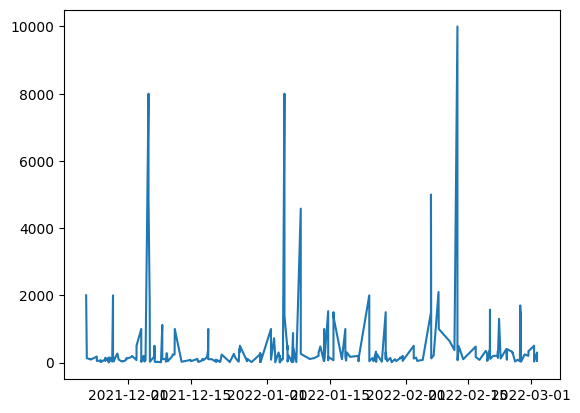

In [213]:
import matplotlib.pyplot as plt

plt.plot(df['Date'],df['INR'])

In [217]:
# day wise chart
df['day_name'] = df['Date'].dt.day_name()

<Axes: xlabel='day_name'>

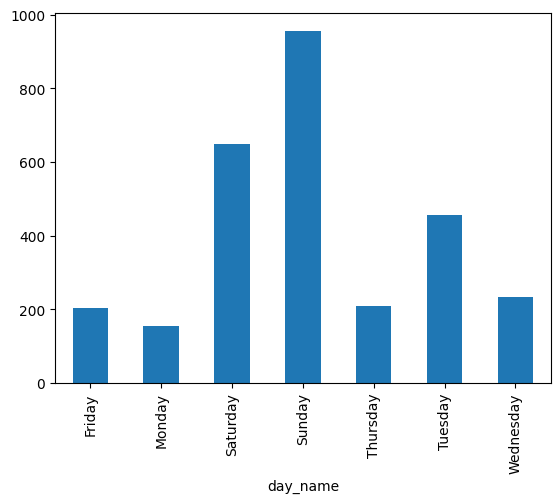

In [221]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [219]:
df['month_name'] = df['Date'].dt.month_name()

<Axes: xlabel='month_name'>

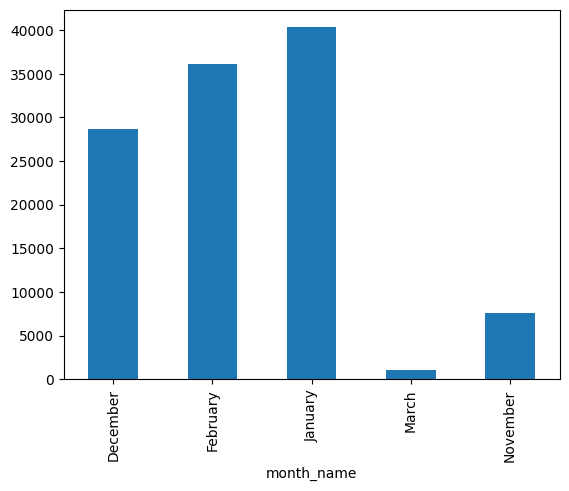

In [220]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [223]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
